In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from collections import Counter 

plt.style.use('seaborn') 
sns.set(font_scale=1.5) 

import missingno as msno 

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline


##### 데이터 불러오기

In [2]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

##### 데이터 확인

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,NaN,21695,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,222000.000000
1,2,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250.000000
2,3,20,RL,88.0,12803,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,221000.000000
3,4,60,FV,114.0,8314,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,11,2006,WD,Normal,190269.599579
4,5,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,180000.000000


In [4]:
df_train.shape, df_test.shape

((1751, 81), (1168, 80))

##### 수치형 데이터와 범주형 데이터 나누기

In [5]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [6]:
print(df_train[numerical_feats].columns) # 수치형
print("*"*80) 
print(df_train[categorical_feats].columns) # 범주형

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual'

##### 이상치 탐색 및 제거
- IQR을 이용한 함수를 지정하여 탐색기준 잡기
- train데이터의 이상치 탐색

In [7]:
def detect_outliers(df, n, features): 
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
    
    return multiple_outliers 
Outliers_to_drop = detect_outliers(df_train, 2, ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                                                 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
                                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                                                 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                                                 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                                                 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                                                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
                                                 'YrSold'])


- 이상치가 발견된 행 확인

In [8]:
df_train.loc[Outliers_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
28,29,190,RM,60.0,10800,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,163000.000000
86,87,190,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,72394.083792
193,194,190,RM,85.0,13600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,90000.000000
196,197,190,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,136072.916252
325,326,190,RH,NaN,7082,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,160000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,20,RL,76.0,11355,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Othr,6500,4,2008,WD,Normal,187664.806055
617,618,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.000000
1051,1052,20,RL,80.0,12048,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,151225.190506
1130,1131,20,RL,72.0,10152,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,166444.087792


- 85개의 행에서 이상치 발견
- 이상치가 있는 행 삭제

In [9]:
df_train = df_train.drop(Outliers_to_drop, axis= 0).reset_index(drop = True)
df_train.shape

(1666, 81)

##### 결측치 확인

In [10]:
for col in df_train.columns: 
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0])) 
    print(msperc)


column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.18%
column: LotFrontage	 Percent of NaN value: 17.11%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 93.34%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.06%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

In [11]:
for col in df_test.columns: 
    msperc = 'column: {:>10}\t 결측치 비율: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0])) 
    print(msperc)


column:         Id	 결측치 비율: 0.00%
column: MSSubClass	 결측치 비율: 0.00%
column:   MSZoning	 결측치 비율: 0.00%
column: LotFrontage	 결측치 비율: 15.84%
column:    LotArea	 결측치 비율: 0.00%
column:     Street	 결측치 비율: 0.00%
column:      Alley	 결측치 비율: 93.75%
column:   LotShape	 결측치 비율: 0.00%
column: LandContour	 결측치 비율: 0.00%
column:  Utilities	 결측치 비율: 0.09%
column:  LotConfig	 결측치 비율: 0.00%
column:  LandSlope	 결측치 비율: 0.00%
column: Neighborhood	 결측치 비율: 0.00%
column: Condition1	 결측치 비율: 0.00%
column: Condition2	 결측치 비율: 0.00%
column:   BldgType	 결측치 비율: 0.00%
column: HouseStyle	 결측치 비율: 0.00%
column: OverallQual	 결측치 비율: 0.00%
column: OverallCond	 결측치 비율: 0.00%
column:  YearBuilt	 결측치 비율: 0.00%
column: YearRemodAdd	 결측치 비율: 0.00%
column:  RoofStyle	 결측치 비율: 0.00%
column:   RoofMatl	 결측치 비율: 0.00%
column: Exterior1st	 결측치 비율: 0.09%
column: Exterior2nd	 결측치 비율: 0.09%
column: MasVnrType	 결측치 비율: 0.60%
column: MasVnrArea	 결측치 비율: 0.60%
column:  ExterQual	 결측치 비율: 0.00%
column:  ExterCond	 결측치 비율: 0.00%
co

##### 결측치 데이터 시각화

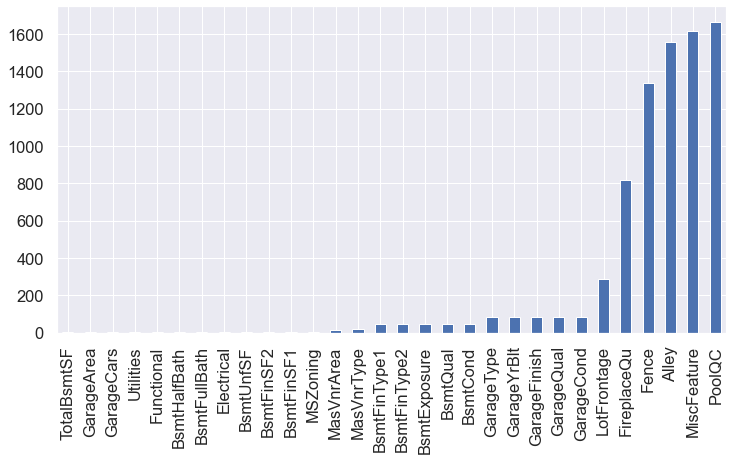

In [12]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))

- 결측치가 가장 많은 변수는 PoolQC, MiscFeaturem Alley 순서

##### 비대칭도 확인

In [13]:
for col in numerical_feats:
    print('{:15}'.format(col),
         '비대칭도: {:05.2f}'.format(df_train[col].skew()),
         '   ',
         '첨도: {:06.2f}'.format(df_train[col].kurt())
         )

Id              비대칭도: -0.00     첨도: -01.20
MSSubClass      비대칭도: 01.33     첨도: 001.31
LotFrontage     비대칭도: 01.20     첨도: 009.88
LotArea         비대칭도: 15.08     첨도: 367.97
OverallQual     비대칭도: 00.15     첨도: 000.05
OverallCond     비대칭도: 00.61     첨도: 001.37
YearBuilt       비대칭도: -0.61     첨도: -00.50
YearRemodAdd    비대칭도: -0.43     첨도: -01.36
MasVnrArea      비대칭도: 02.53     첨도: 009.11
BsmtFinSF1      비대칭도: 00.81     첨도: 000.13
BsmtFinSF2      비대칭도: 04.21     첨도: 019.01
BsmtUnfSF       비대칭도: 00.97     첨도: 000.52
TotalBsmtSF     비대칭도: 00.40     첨도: 001.12
1stFlrSF        비대칭도: 00.83     첨도: 000.66
2ndFlrSF        비대칭도: 00.78     첨도: -00.79
LowQualFinSF    비대칭도: 14.84     첨도: 269.23
GrLivArea       비대칭도: 00.64     첨도: 000.37
BsmtFullBath    비대칭도: 00.60     첨도: -00.92
BsmtHalfBath    비대칭도: 04.12     첨도: 016.86
FullBath        비대칭도: -0.00     첨도: -01.18
HalfBath        비대칭도: 00.64     첨도: -01.26
BedroomAbvGr    비대칭도: 00.09     첨도: 001.37
KitchenAbvGr    비대칭도: 04.54     첨도: 024.76
TotRmsAbvGr

##### EDA

- 수치형 데이터들을 알아보기 위해 4가지의 plot 그리기

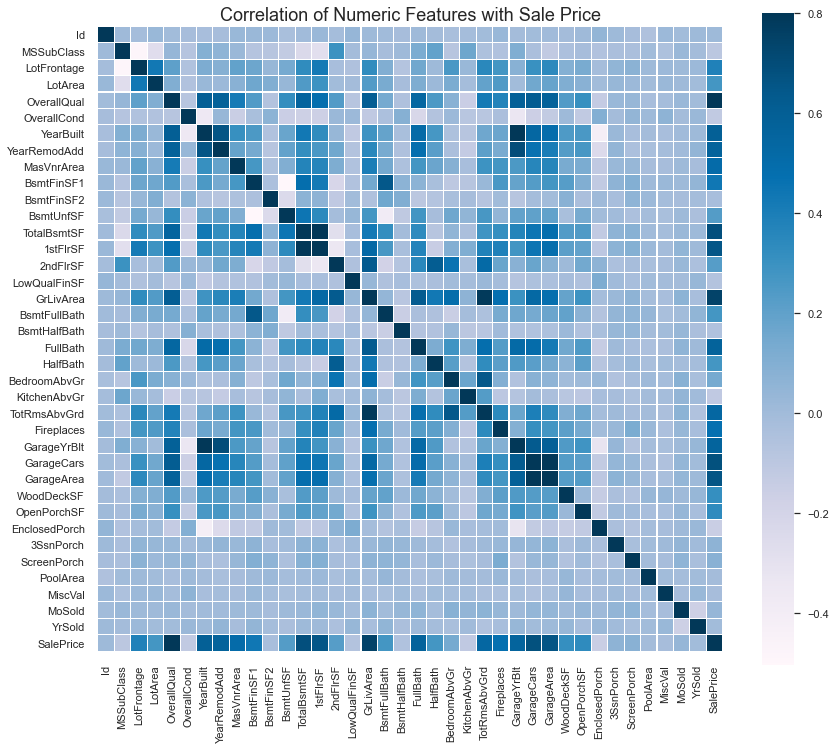

In [14]:
corr_data = df_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                      'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
                      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                      'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                      'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                      'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
                      'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                      'MiscVal', 'MoSold', 'YrSold', 'SalePrice']] 

colormap = plt.cm.PuBu 
sns.set(font_scale=1.0) 

f , ax = plt.subplots(figsize = (14,12)) 
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=18) 
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1, 
            cmap = colormap, linecolor = "white", vmax=0.8)



- 'GrLivArea', 'TotalBsmtSF'및 'OverallQual'은 Target feature와 큰 연관성을 띈다

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
       'GarageArea', '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd',
       'GarageYrBlt'],
      dtype='object')


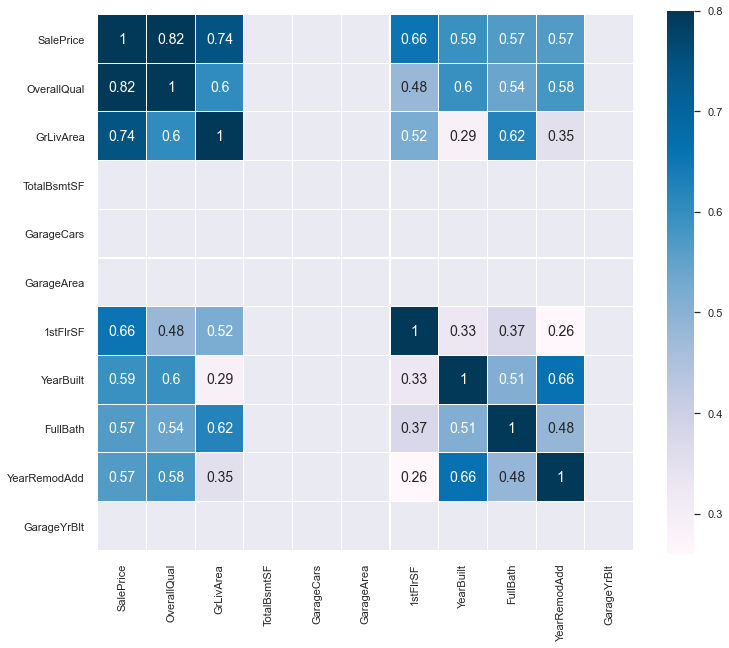

In [15]:
k= 11 
cols = corr_data.corr().nlargest(k,'SalePrice')['SalePrice'].index 
print(cols) 
cm = np.corrcoef(df_train[cols].values.T) 
f , ax = plt.subplots(figsize = (12,10)) 
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap, 
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)


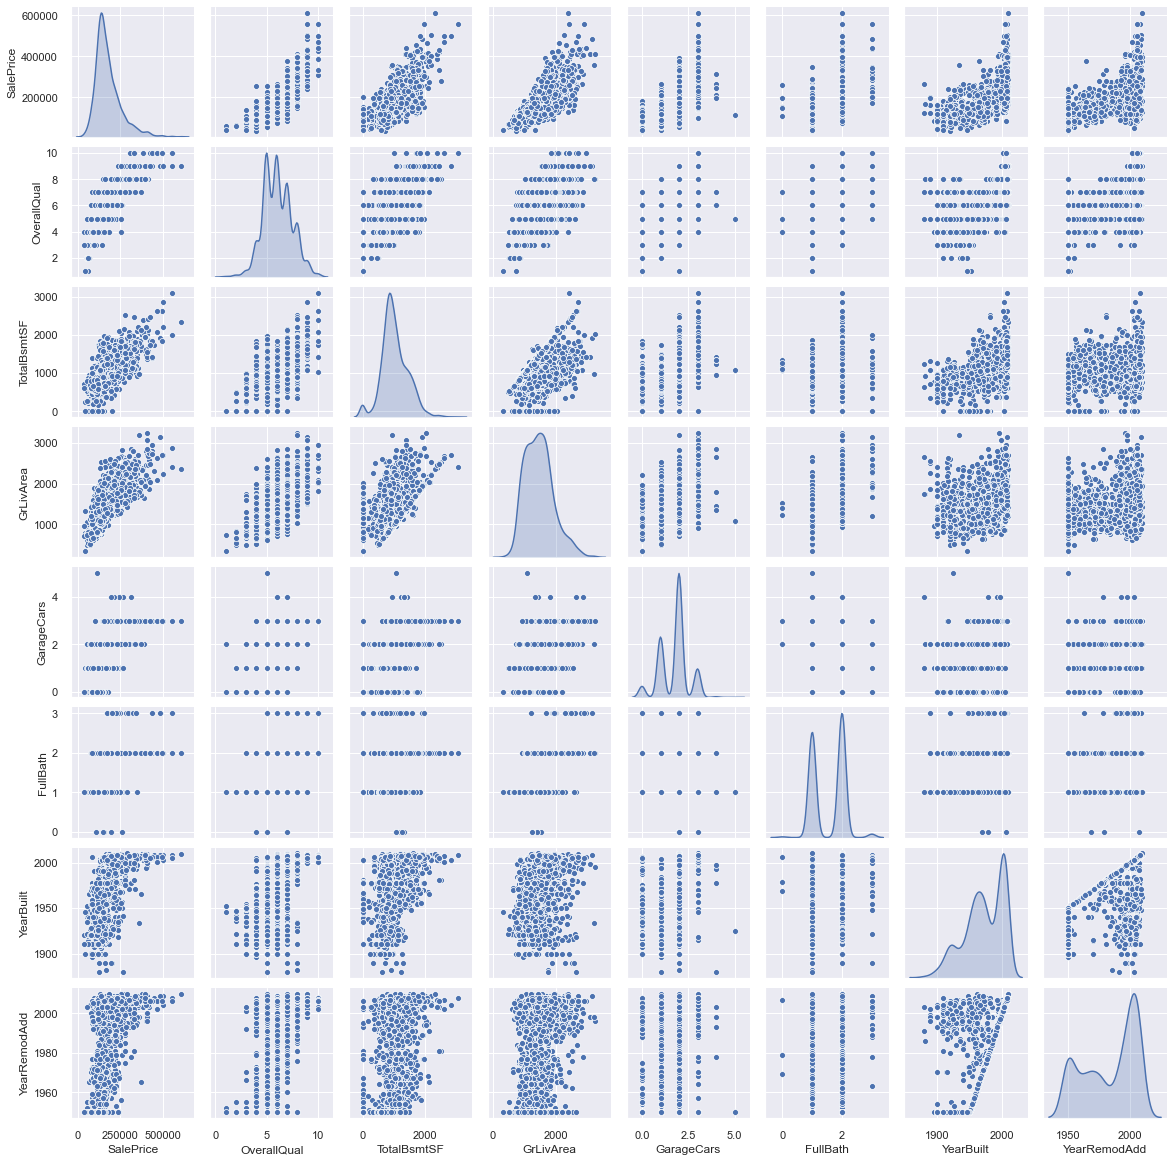

In [16]:
sns.set() 
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd'] 
sns.pairplot(df_train[columns],size = 2 ,kind ='scatter',diag_kind='kde') 
plt.show()

- 'TotalBsmtSF'와 'GrLiveArea'는 데이터 설명에서 알 수 있듯이<br> 지하실의 면적과 생활공간 면적을 의미
- 지하실 면적이 지상 생활 면적과 같을 수 있지만, 더 크진 않기 때문에 보여지는 특징


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


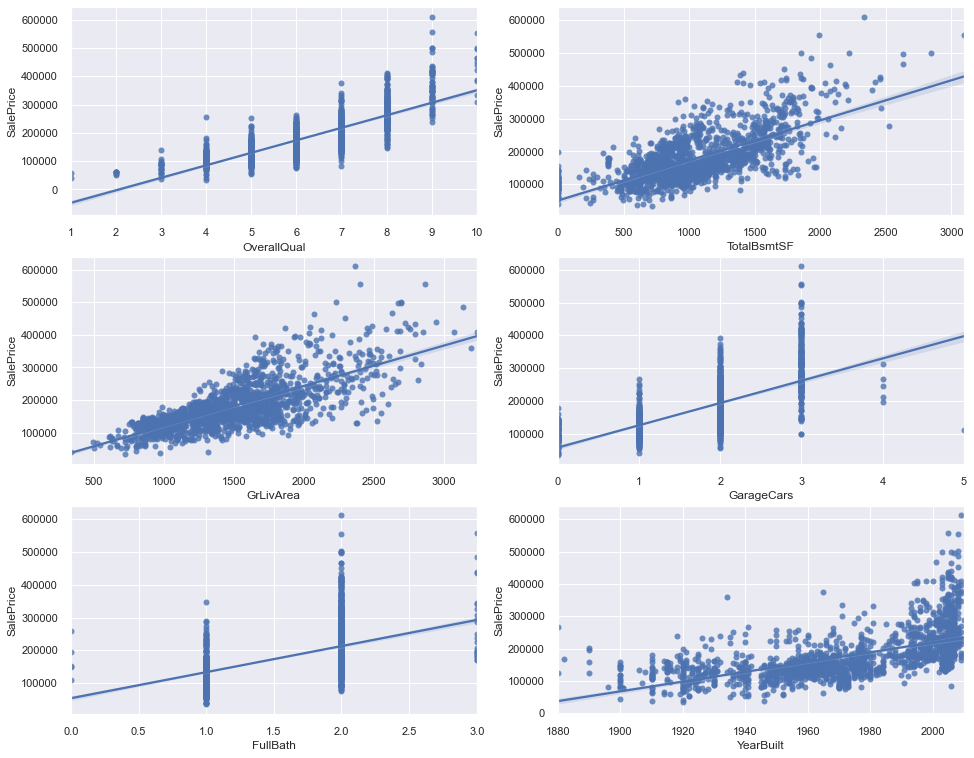

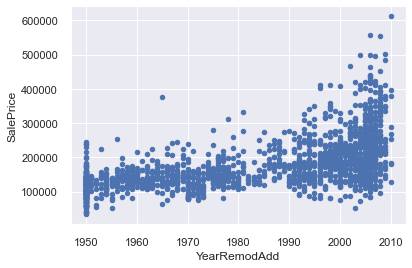

In [17]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,13)) 
OverallQual_scatter_plot = pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis = 1) 
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1) 
TotalBsmtSF_scatter_plot = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis = 1) 
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2) 
GrLivArea_scatter_plot = pd.concat([df_train['SalePrice'],df_train['GrLivArea']],axis = 1) 
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3) 
GarageCars_scatter_plot = pd.concat([df_train['SalePrice'],df_train['GarageCars']],axis = 1) 
sns.regplot(x='GarageCars',y = 'SalePrice',data = GarageCars_scatter_plot,scatter= True, fit_reg=True, ax=ax4) 
FullBath_scatter_plot = pd.concat([df_train['SalePrice'],df_train['FullBath']],axis = 1) 
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5) 
YearBuilt_scatter_plot = pd.concat([df_train['SalePrice'],df_train['YearBuilt']],axis = 1) 
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6) 
YearRemodAdd_scatter_plot = pd.concat([df_train['SalePrice'],df_train['YearRemodAdd']],axis = 1) 
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

- OverallQual, GarageCars, Fullbath와 같은 변수들은 <br>실제로는 범주형 데이터의 특징을 보인다고 할 수 있다. (등급, 개수 등을 의미하기 때문)